In [1]:
import tensorflow as tf
import os


In [ ]:
# import cv2
# import imghdr

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:

data = tf.keras.utils.image_dataset_from_directory('data3')


Found 3000 files belonging to 6 classes.


In [4]:
data = data.map(lambda x,y: (x/255, y))
 

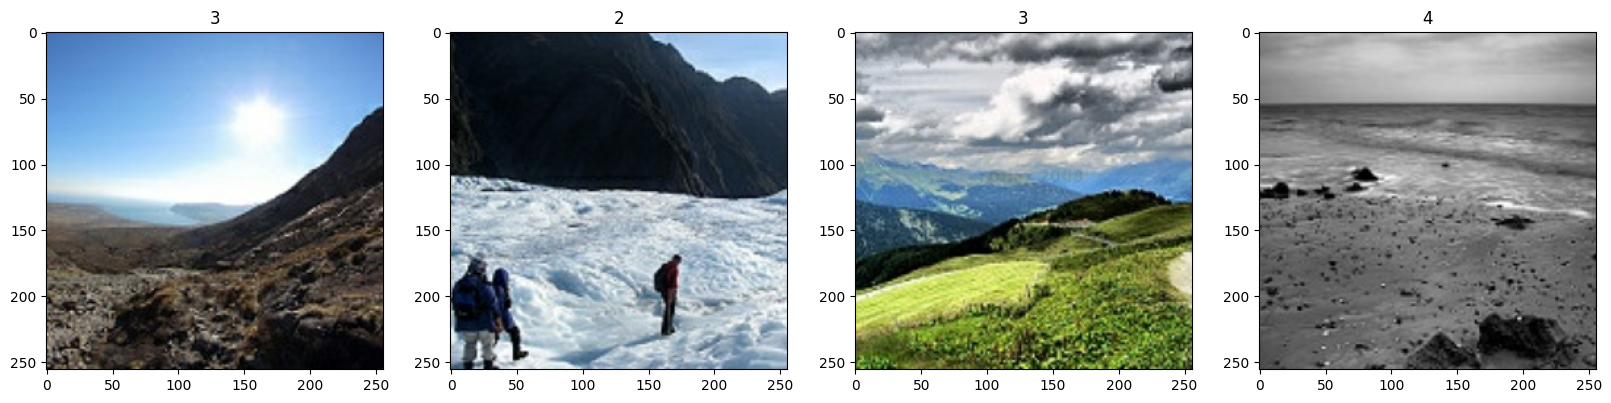

In [5]:


scaled_iterator = data.as_numpy_iterator() 


batch = scaled_iterator.next() #images represented as numpy arrays

# print(batch[0].shape)

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [6]:
len(data)*0.7 #batches

65.8

In [7]:
train_size = int(len(data)*.7) #to train
val_size = int(len(data)*.2) #to evaluate while training
test_size = int(len(data)*.1) #to test

In [ ]:
test_size

In [8]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [9]:
len(test)

9

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [11]:
model = Sequential()


In [12]:
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3), kernel_regularizer=tf.keras.regularizers.L2(l=0.01)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l=0.01)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(16, (3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l=0.01)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(16, (3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l=0.01)))
model.add(MaxPooling2D(2,2))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))




In [13]:
model.compile('adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])


In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [15]:
logdir='logs' #


In [16]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) #to save model


In [ ]:
train[1]

In [17]:
# hist = model.fit(train, epochs=3, validation_data=val,callbacks=[tensorboard_callback])
hist = model.fit(train, epochs=10, validation_data=val)


Epoch 1/10
65/65 [==============================] - 109s 2s/step - loss: 1.9092 - accuracy: 0.4173 - val_loss: 1.4273 - val_accuracy: 0.5521
Epoch 2/10
65/65 [==============================] - 100s 2s/step - loss: 1.3707 - accuracy: 0.5736 - val_loss: 1.2785 - val_accuracy: 0.5747
Epoch 3/10
65/65 [==============================] - 100s 2s/step - loss: 1.2369 - accuracy: 0.6202 - val_loss: 1.1747 - val_accuracy: 0.5990
Epoch 4/10
65/65 [==============================] - 102s 2s/step - loss: 1.1206 - accuracy: 0.6510 - val_loss: 1.1314 - val_accuracy: 0.6163
Epoch 5/10
65/65 [==============================] - 102s 2s/step - loss: 1.0516 - accuracy: 0.6769 - val_loss: 1.0624 - val_accuracy: 0.6458
Epoch 6/10
65/65 [==============================] - 102s 2s/step - loss: 0.9649 - accuracy: 0.7067 - val_loss: 0.9680 - val_accuracy: 0.7101
Epoch 7/10
65/65 [==============================] - 102s 2s/step - loss: 0.9144 - accuracy: 0.7260 - val_loss: 1.0585 - val_accuracy: 0.6806
Epoch 8/10
65

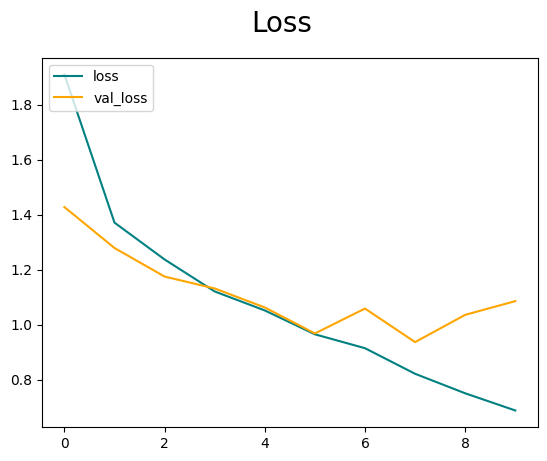

In [18]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

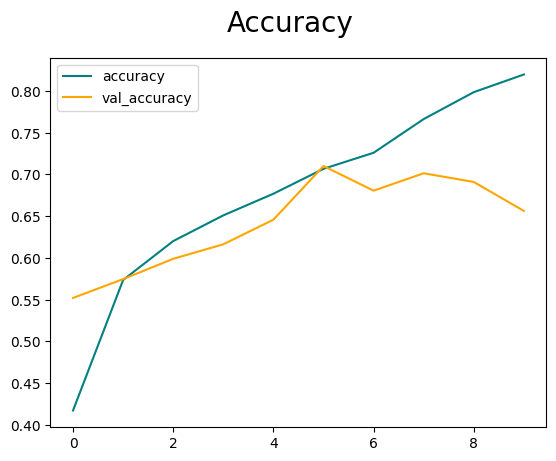

In [19]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [67]:
from tensorflow.keras.metrics import Precision, Recall, TopKCategoricalAccuracy


In [68]:
pre = Precision() #
re = Recall() #
acc = SparseCategoricalAccuracy() #

In [73]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    predict_x=model.predict(X) 
    y_pred=np.argmax(predict_x,axis=1)

    pre.update_state(y, y_pred)
    re.update_state(y, y_pred)
    acc.update_state(y, y_pred)

1/1 [==============================] - 0s 204ms/step


InvalidArgumentError: {{function_node __wrapped__Squeeze_device_/job:localhost/replica:0/task:0/device:CPU:0}} Can not squeeze dim[0], expected a dimension of 1, got 32 [Op:Squeeze]

In [72]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()},Accuracy: {acc.result().numpy()}')


Precision:0.940625011920929, Recall: 0.9678456783294678,Accuracy: 0.0
